In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

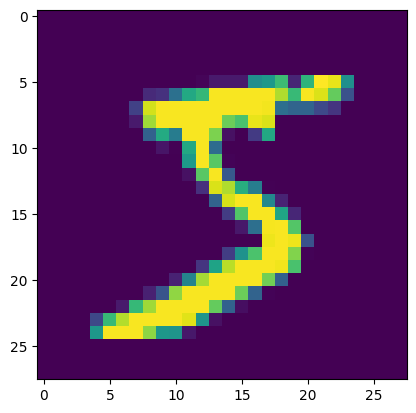

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=( 28 ,28,1),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 89s 46ms/step - loss: 0.2082 - accuracy: 0.9344
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0741 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0556 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0447 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0373 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 59s 31m

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.0505 - accuracy: 0.9884


[0.050462108105421066, 0.9883999824523926]

In [12]:
pred=model.predict(x_test)
#pred=np.argmax(pred)

313/313 [==============================] - 5s 15ms/step


In [13]:
pred

array([[1.9976813e-13, 1.9191200e-08, 4.0392547e-09, ..., 1.0000000e+00,
        6.0467568e-12, 1.6493397e-09],
       [3.2146144e-07, 1.8161908e-13, 9.9999964e-01, ..., 5.2747497e-11,
        3.2706059e-13, 2.3171003e-11],
       [2.3692598e-11, 1.0000000e+00, 1.3779612e-10, ..., 1.1829484e-09,
        9.6473596e-10, 4.0965235e-12],
       ...,
       [4.1772417e-19, 7.1248664e-18, 5.6039091e-16, ..., 2.5778707e-16,
        7.5870584e-14, 6.4793076e-16],
       [3.5196152e-07, 4.0873127e-09, 2.4932886e-08, ..., 3.5462946e-08,
        6.9224020e-06, 1.6621411e-07],
       [6.6821935e-06, 1.8072236e-12, 2.3025770e-08, ..., 1.6884845e-15,
        2.3821775e-10, 5.7465251e-11]], dtype=float32)

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
np.argmax(pred[2])

1